# Notebook for testing LCA calculations

Log
2025-05-12: initial version

We first define the function we want to test

In [17]:
import os
print(os.getcwd())

c:\Users\EmmaFrom\Work Folders\Documents\GitHub\rurut\LCC\rurut\LCC\rals_livslangd_python\notebooks


In [7]:
def new_func():
    import sys
    sys.path.append('../')  # Justera om det behövs

    from rail_analysis.LCA import get_LCA_renewal

    # Call the function get_LCA_renewal
    track_length = 1000
    asset_type = 'Track'
    year = 2025
    share_electricity = 0.8
    circularity_coefficient = 0.2

    result = get_LCA_renewal(asset_type, year, share_electricity, circularity_coefficient)
    print(result)

new_func()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\AbdouAA\\Work Folders\\Documents\\GitHub\\rurut\\LCC\\rals_livslangd_python\\data\\raw\\LCA\\\\LCA_indata_EF.csv'

Expand code to include year and share of electricity

In [8]:
import pandas as pd

def get_LCA_renewal (track_length, asset_type, year, share_electricity=1.0, circularity_coeff=0.0):
    EF_ELECTRICITY = 0.006464924
    EF_DIESEL = 0.063583815

    lca = pd.read_csv('../data/raw/LCA/lca_base_data.csv', delimiter=';', encoding='utf-8')
    co2e = pd.read_csv('../data/raw/LCA/co2_valuation.csv', delimiter=';', encoding='utf-8')
    print(co2e.columns.tolist())

    lca['CO2 emissions_kg/m'] = lca['CO2 emissions_kg/m'].str.replace(',', '.').astype(float)
    lca['Energy use_MJ_m'] = lca['Energy use_MJ_m'].str.replace(',', '.').astype(float)
    co2e['CO2_Valuation (kr/kg Co2e)'] = co2e['CO2_Valuation (kr/kg Co2e)'].str.replace(',', '.').astype(float)

    row = lca[lca['Asset'] == asset_type].iloc[0]
    co2_emission = row['CO2 emissions_kg/m']
    energy_use = row['Energy use_MJ_m']

    co2_price = co2e[co2e['Year'] == year]['CO2_Valuation (kr/kg Co2e)'].values[0]

    emission_factor = share_electricity * EF_ELECTRICITY + (1 - share_electricity) * EF_DIESEL
    energy_co2 = energy_use * emission_factor
    total_co2_per_m = co2_emission + energy_co2
    adjusted_co2_per_m = total_co2_per_m * (1 - circularity_coeff)

    total_cost = adjusted_co2_per_m * co2_price * track_length

    return total_cost

track_length = 1000
asset_type = 'Track'
year = 2025
share_electricity = 0.8
circularity_coefficient = 0.2

cost = get_LCA_renewal(track_length, asset_type, year, share_electricity, circularity_coefficient)
print(
    f"Total LCA renewal cost for {asset_type} in year {year} "
    f"with {share_electricity*100:.0f}% electricity and {circularity_coefficient*100:.0f}% circularity: "
    f"{cost:.2f} SEK"
)

['Year', 'CO2_Valuation (kr/kg Co2e)']
Total LCA renewal cost for Track in year 2025 with 80% electricity and 20% circularity: 19655.13 SEK


Test call function from module 

In [3]:
import sys
import os

# Lägg till sökvägen till din modul
sys.path.append(os.path.abspath('../rail_analysis'))

# Importera funktionen
from LCA import get_LCA_renewal

cost = get_LCA_renewal(
    asset_type='Track',
    year=2025,
    track_length=1000,
    circularity_coef=0.2,
    share_electricity=0.8
)

print(f"LCA-kostnad: {cost:.2f} SEK")

LCA-kostnad: 19655.13 SEK


Visualization

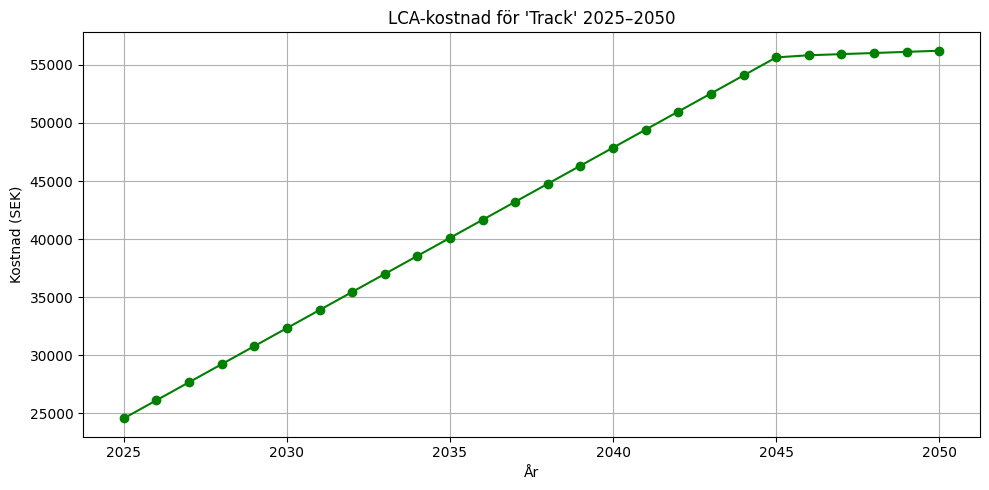

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from LCA import get_LCA_renewal

years = list(range(2025, 2051))
costs = [get_LCA_renewal('Track', year, track_length=1000) for year in years]

plt.figure(figsize=(10, 5))
plt.plot(years, costs, marker='o', color='green')
plt.title("LCA-kostnad för 'Track' 2025–2050")
plt.xlabel("År")
plt.ylabel("Kostnad (SEK)")
plt.grid(True)
plt.tight_layout()
plt.show()

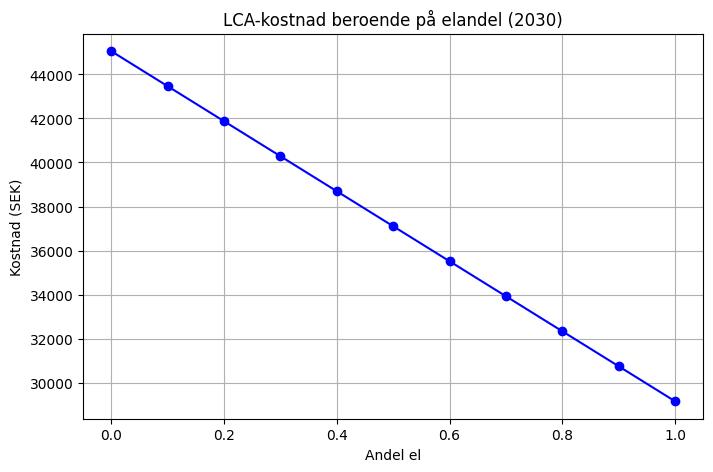

In [5]:
import numpy as np

shares = np.linspace(0, 1, 11)
costs = [get_LCA_renewal('Track', 2030, track_length=1000, share_electricity=s) for s in shares]

plt.figure(figsize=(8, 5))
plt.plot(shares, costs, marker='o', color='blue')
plt.title("LCA-kostnad beroende på elandel (2030)")
plt.xlabel("Andel el")
plt.ylabel("Kostnad (SEK)")
plt.grid(True)
plt.show()